In [127]:
import fitz  # PyMuPDF
import pandas as pd
import matplotlib.pyplot as plt
import re
import tabula
import os
import seaborn as sns
import pytesseract
from PIL import Image
import io

In [129]:
# Ruta del archivo PDF
pdf_path = 'C:/Users/esteb/Proyecto/nuevo_proyecto/PIB_HISTORICO.pdf'

In [131]:
# Datos originales (incluso los faltantes hasta 2024)
data = [
    ['mar-1996', None, None],
    ['jun-1996', 1.0, None],
    ['sept-1996', 1.0, None],
    ['dic-1996', 1.4, None],
    ['mar-1997', 5.6, 2.3],
    ['jun-1997', 6.8, 2.1],
    ['sept-1997', 8.2, 2.3],
    ['dic-1997', 8.9, 2.1],
    ['mar-1998', 7.7, 0.8],
    ['jun-1998', 6.9, 1.7],
    ['sept-1998', 3.9, -0.7],
    ['dic-1998', -1.4, -3.2],
    ['mar-1999', -2.5, 0.0],
    ['jun-1999', -3.2, 0.3],
    ['sept-1999', -0.7, 2.1],
    ['dic-1999', 5.4, 2.6],
    ['mar-2000', 5.8, 0.9],
    ['jun-2000', 5.8, 0.2],
    ['sept-2000', 5.0, 1.6],
    ['dic-2000', 3.4, 1.2],
    ['mar-2001', 3.4, 0.7],
    ['jun-2001', 4.2, 1.0],
    ['sept-2001', 2.8, -0.2],
    ['dic-2001', 2.3, 0.6],
    ['mar-2002', 1.2, 0.8],
    ['jun-2002', 2.6, 0.8],
    ['sept-2002', 4.2, 1.1],
    ['dic-2002', 4.8, 1.5],
    ['mar-2003', 5.3, 1.4],
    ['jun-2003', 5.1, 1.1],
    ['sept-2003', 4.6, 0.7],
    ['dic-2003', 3.9, 0.5],
    ['mar-2004', 4.7, 2.1],
    ['jun-2004', 5.6, 1.9],
    ['sept-2004', 7.4, 2.6],
    ['dic-2004', 8.8, 1.6],
    ['mar-2005', 6.2, 0.1],
    ['jun-2005', 5.9, 1.7],
    ['sept-2005', 5.7, 2.4],
    ['dic-2005', 5.5, 1.2],
    ['mar-2006', 6.0, 0.9],
    ['jun-2006', 6.3, 2.1],
    ['sept-2006', 5.6, 1.4],
    ['dic-2006', 6.3, 2.1],
    ['mar-2007', 5.5, 1.0],
    ['jun-2007', 5.5, 1.0],
    ['sept-2007', 4.9, 0.3],
    ['dic-2007', 4.8, 1.9],
    ['mar-2008', 6.1, 2.1],
    ['jun-2008', 5.0, 0.1],
    ['sept-2008', 3.6, -0.8],
    ['dic-2008', 0.7, -0.8],
    ['mar-2009', -2.3, -0.5],
    ['jun-2009', -2.8, -0.6],
    ['sept-2009', -0.7, 1.2],
    ['dic-2009', 1.3, 1.2],
    ['mar-2010', 1.9, 0.3],
    ['jun-2010', 6.4, 3.4],
    ['sept-2010', 7.5, 2.3],
    ['dic-2010', 7.5, 1.2],
    ['mar-2011', 8.8, 1.2],
    ['jun-2011', 6.3, 1.4],
    ['sept-2011', 4.5, 0.6],
    ['dic-2011', 5.5, 2.2],
    ['mar-2012', 6.0, 2.1],
    ['jun-2012', 6.5, 1.9],
    ['sept-2012', 6.6, 0.8],
    ['dic-2012', 5.5, 0.6],
    ['mar-2013', 4.1, 0.9],
    ['jun-2013', 3.4, 0.7],
    ['sept-2013', 2.9, 0.8],
    ['dic-2013', 2.8, 0.4],
    ['mar-2014', 2.4, 0.2],
    ['jun-2014', 1.7, 0.7],
    ['sept-2014', 1.3, -0.4],
    ['dic-2014', 1.7, 1.3],
    ['mar-2015', 2.5, 0.5],
    ['jun-2015', 2.0, 0.9],
    ['sept-2015', 2.3, -0.3],
    ['dic-2015', 1.8, 0.9],
    ['mar-2016', 3.0, 1.0],
    ['jun-2016', 1.3, -0.6],
    ['sept-2016', 2.0, 0.7],
    ['dic-2016', 0.9, 0.1],
    ['mar-2017', -0.4, -0.8],
    ['jun-2017', 0.7, 1.3],
    ['sept-2017', 1.9, 1.9],
    ['dic-2017', 3.2, 1.0],
    ['mar-2018', 4.5, 0.9],
    ['jun-2018', 5.5, 1.3],
    ['sept-2018', 2.4, -0.4],
    ['dic-2018', 3.5, 1.5],
    ['mar-2019', 1.2, -0.8],
    ['jun-2019', 1.2, 1.3],
    ['sept-2019', 3.2, 0.3],
    ['dic-2019', -2.7, -3.9],
    ['mar-2020', -0.2, 1.9],
    ['jun-2020', -15.0, -12.8],
    ['sept-2020', -9.5, 5.2],
    ['dic-2020', 0.1, 6.9],
    ['mar-2021', 0.5, 3.6],
    ['jun-2021', 18.3, 0.9],
    ['sept-2021', 16.2, 4.4],
    ['dic-2021', 11.6, 2.4],
    ['mar-2022', 6.3, -1.5],
    ['jun-2022', 4.4, -0.6],
    ['sept-2022', 0.5, -0.1],
    ['dic-2022', -2.3, 0.0],
    ['mar-2023', 0.3, 0.7],
    ['jun-2023', -0.4, -0.9],
    ['sept-2023', 0.6, 0.9],
    ['dic-2023', 0.4, 0.1],
    ['mar-2024', 2.3, 1.9]
]

# Crear DataFrame
df = pd.DataFrame(data, columns=['Fecha', 'Var_Anual', 'Var_Trimestral'])

# Mapear los nombres de los meses en español a inglés
meses = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Reemplazar los nombres de los meses en español por los equivalentes en inglés
df['Fecha'] = df['Fecha'].replace(meses, regex=True)

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y')


# Guardar el DataFrame en un archivo CSV
df.to_csv('pib_historico_act.csv', index=False)


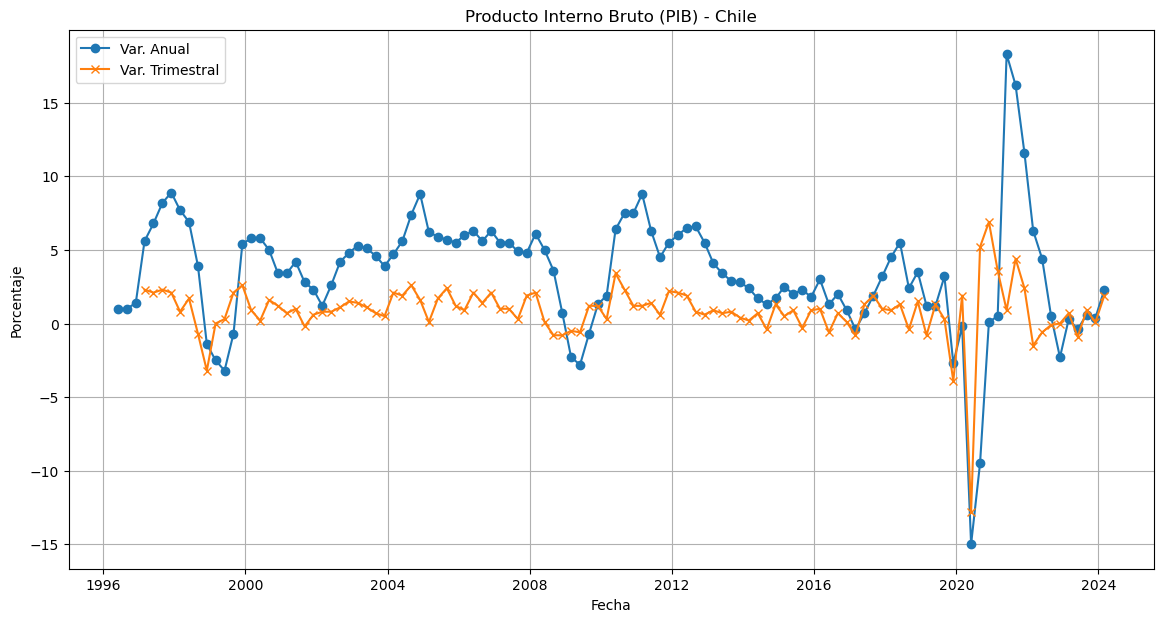

In [133]:
# Visualizar los datos
plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Var_Anual'], marker='o', label='Var. Anual')
plt.plot(df['Fecha'], df['Var_Trimestral'], marker='x', label='Var. Trimestral')
plt.title('Producto Interno Bruto (PIB) - Chile')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
plt.legend()
plt.grid(True)
plt.show()


In [135]:
# Ruta del archivo PDF
pdf_path = 'C:/Users/esteb/Proyecto/nuevo_proyecto/IPC_HISTORICO.pdf'

In [137]:
# Extraer todas las tablas del PDF
tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

# Función para limpiar y formatear cada tabla
def clean_table(table, date_format='%b.%Y'):
    # Renombrar columnas según la estructura de la tabla
    if len(table.columns) == 2:
        table.columns = ['Fecha', 'IPC_Variacion']
    elif len(table.columns) == 3:
        table.columns = [table.columns[0], 'Fecha', 'IPC_Variacion']
        table = table[['Fecha', 'IPC_Variacion']]
    else:
        table = pd.DataFrame()
    
    # Convertir la columna 'Fecha' a tipo datetime
    table['Fecha'] = pd.to_datetime(table['Fecha'], format=date_format, errors='coerce')
    
    # Convertir la columna 'IPC_Variacion' a numérico
    table['IPC_Variacion'] = pd.to_numeric(table['IPC_Variacion'].str.replace(',', '.'), errors='coerce')
    
    return table.dropna()

# Aplicar la función de limpieza a todas las tablas válidas
cleaned_tables = [clean_table(table) for table in tables if len(table.columns) > 1]

# Combinar todas las tablas limpiadas en un único DataFrame
ipc_data = pd.concat(cleaned_tables, ignore_index=True)

# Eliminar filas con fechas no válidas
ipc_data = ipc_data.dropna(subset=['Fecha'])

# Ordenar los datos por fecha
ipc_data.sort_values(by='Fecha', inplace=True)

# Mostrar los primeros y últimos registros del DataFrame procesado
print("Primeros registros:")
print(ipc_data.head(), "\n")

print("Últimos registros:")
print(ipc_data.tail())

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


Primeros registros:
       Fecha  IPC_Variacion
0 2011-02-01            2.7
1 2011-03-01            3.4
2 2011-05-01            3.3
3 2011-06-01            3.4
4 2011-07-01            2.9 

Últimos registros:
        Fecha  IPC_Variacion
89 2023-11-01            4.8
90 2024-02-01            4.5
91 2024-03-01            3.7
92 2024-05-01            4.1
93 2024-06-01            4.2


In [139]:
# Guardar el DataFrame en un archivo CSV
output_csv_path = 'ipc_historico_act.csv'
ipc_data.to_csv(output_csv_path, index=False)

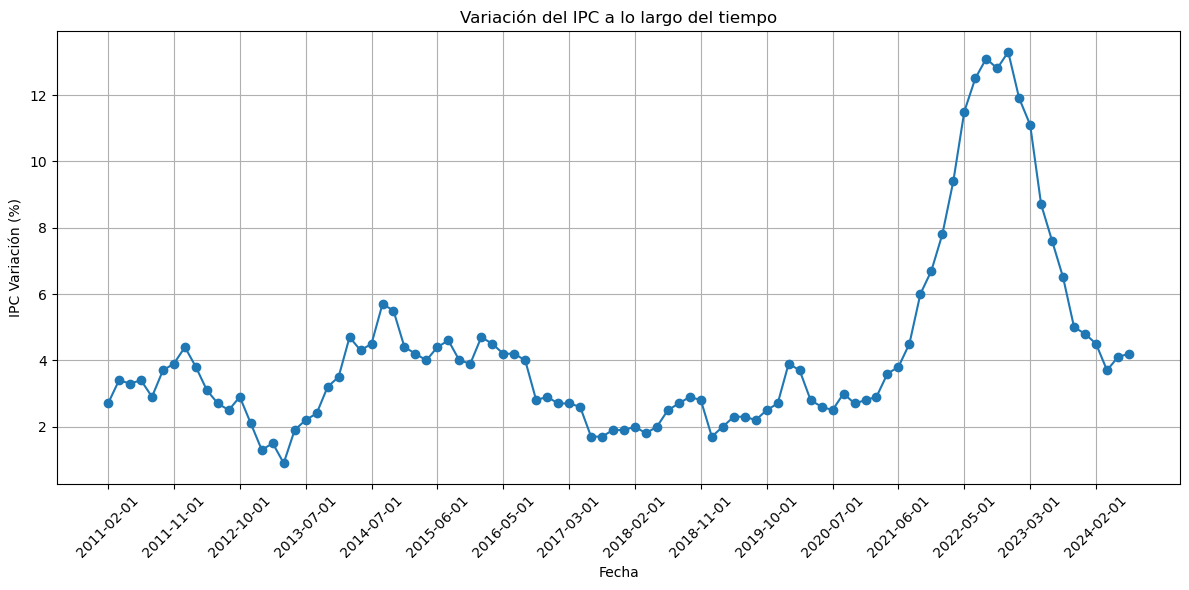

In [141]:
# Leer los datos del archivo CSV
ipc_data = pd.read_csv('ipc_historico_act.csv')

# Crear una figura y un eje
plt.figure(figsize=(12, 6))
plt.plot(ipc_data['Fecha'], ipc_data['IPC_Variacion'], marker='o', linestyle='-')

# Añadir títulos y etiquetas
plt.title('Variación del IPC a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('IPC Variación (%)')

# Ajustar la frecuencia de las etiquetas del eje x
plt.xticks(ticks=range(0, len(ipc_data['Fecha']), 6), rotation=45)

# Añadir una cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [143]:
# Cargar el archivo CSV
file_path = 'C:/Users/esteb/Proyecto/Desempleo_limpio.csv'  # Actualiza esta ruta a la ubicación de tu archivo
desempleo_data = pd.read_csv(file_path)

# Reemplazar comas por puntos y convertir columnas numéricas a tipo float
cols_to_convert = desempleo_data.columns[1:]  # Todas las columnas excepto la primera que es Periodo
for col in cols_to_convert:
    desempleo_data[col] = desempleo_data[col].str.replace(',', '.').astype(float)

# Renombrar columnas para eliminar caracteres especiales y espacios
desempleo_data.columns = [col.replace(' ', '_').replace('.', '').replace('’', '').replace('ó', 'o') for col in desempleo_data.columns]

# Mostrar los primeros datos para verificar
print(desempleo_data.head())

# Guardar el DataFrame limpio en un nuevo archivo CSV
desempleo_data.to_csv('Desempleo_limpio_actualizado.csv', index=False)


    Periodo  Nacional  Tarapacá  Antofagasta  Atacama  Coquimbo  Valparaíso  \
0  mar.2010      9.23      6.88         8.66     9.14     10.21       11.19   
1  abr.2010      8.84      5.67         7.20     7.56      9.41       10.72   
2  may.2010      9.09      5.99         8.01     8.68      9.19       11.02   
3  jun.2010      8.66      6.13         7.10     8.22      8.20       10.55   
4  jul.2010      8.51      4.96         7.95     8.01      8.55       10.40   

   Libertador_Gral_Bernardo_OHiggins  Maule  Biobío  La_Araucanía  Los_Ríos  \
0                               6.07   8.11   10.04          8.69      7.17   
1                               5.45   7.79   10.77          8.54      7.12   
2                               6.65   8.13   11.11          8.45      7.67   
3                               6.66   8.21   10.27          9.48      8.63   
4                               8.09   8.38    9.78          9.95      8.50   

   Los_Lagos  Aysén_del_Gral_Carlos_Ibáñez_del_Cam

In [145]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
desempleo_data.to_csv('Desempleo_limpio_actualizado.csv', index=False)


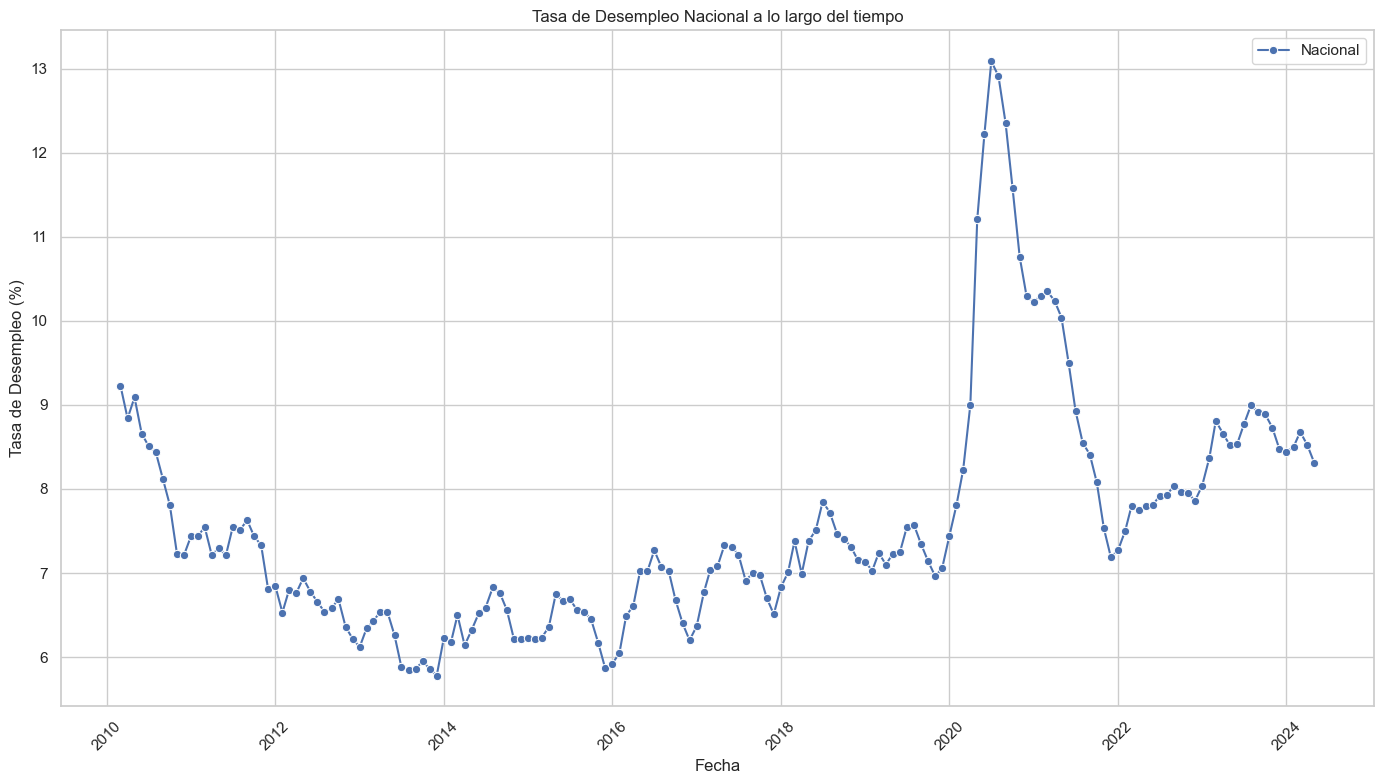

In [147]:
# Cargar el archivo CSV limpio
file_path = 'Desempleo_limpio_actualizado.csv'
desempleo_data = pd.read_csv(file_path)

# Función para convertir los nombres de los meses en español a números
def convertir_fecha(fecha_str):
    meses = {
        'ene': '01',
        'feb': '02',
        'mar': '03',
        'abr': '04',
        'may': '05',
        'jun': '06',
        'jul': '07',
        'ago': '08',
        'sept': '09',
        'oct': '10',
        'nov': '11',
        'dic': '12'
    }
    mes_abr, año = fecha_str.split('.')
    mes = meses[mes_abr.lower()]
    return f'{año}-{mes}-01'

# Convertir las fechas al formato adecuado
desempleo_data['Periodo'] = desempleo_data['Periodo'].apply(convertir_fecha)
desempleo_data['Periodo'] = pd.to_datetime(desempleo_data['Periodo'])

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y ejes para la visualización
plt.figure(figsize=(14, 8))

# Graficar la tasa de desempleo nacional
sns.lineplot(data=desempleo_data, x='Periodo', y='Nacional', marker='o', label='Nacional')

# Añadir título y etiquetas a los ejes
plt.title('Tasa de Desempleo Nacional a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo (%)')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [149]:
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import pandas as pd
import io

# Ruta del archivo PDF
file_path = 'C:/Users/esteb/Proyecto/nuevo_proyecto/ingresos_2022.pdf'

# Abrir el archivo PDF
pdf_document = fitz.open(file_path)
images = []

# Extraer imágenes de cada página
for page_num in range(len(pdf_document)):
    page = pdf_document.load_page(page_num)
    pix = page.get_pixmap()
    img = Image.open(io.BytesIO(pix.tobytes()))
    images.append(img)

# Usar OCR para extraer texto de las imágenes
extracted_text = []
for img in images:
    text = pytesseract.image_to_string(img, lang='spa')  # Usar el idioma español
    extracted_text.append(text)

# Guardar el texto extraído en un archivo para revisión manual
with open('extracted_text.txt', 'w', encoding='utf-8') as f:
    for text in extracted_text:
        f.write(text)
        f.write('\n\n' + '='*80 + '\n\n')

# Procesar el texto extraído para formar tablas (esto puede requerir ajustes manuales)
# Por ejemplo, podrías buscar patrones específicos para extraer los datos tabulares

# Aquí solo mostramos cómo guardar el texto extraído
print("Texto extraído guardado en 'extracted_text.txt'. Revisa el archivo para verificar la extracción.")

Texto extraído guardado en 'extracted_text.txt'. Revisa el archivo para verificar la extracción.


In [151]:
# Crear una lista de datos con los valores extraídos
data = [
    ["Ingreso medio mensual total país", 757752],
    ["Ingreso mediano mensual total país", 502604],
    ["Ingreso medio hombres", 850412],
    ["Ingreso medio mujeres", 63334],
    ["Ingreso mediano hombres", 572968],
    ["Ingreso mediano mujeres", 454723],
    ["Masa de ingresos hombres", 4179712],
    ["Masa de ingresos mujeres", 2318220],
    ["Brecha de género en ingreso medio", -25.5],
    ["Brecha de género en ingreso mediano", -25.5],
    ["Brecha de género en masa de ingresos", -44.5],
    ["Ingreso medio primaria", 378246],
    ["Ingreso mediano primaria", 387005],
    ["Ingreso medio secundaria", 510749],
    ["Ingreso mediano secundaria", 445663],
    ["Ingreso medio técnica", 440396],
    ["Ingreso mediano técnica", 301562],
    ["Ingreso medio universitaria", 1115576],
    ["Ingreso mediano universitaria", 445663],
    ["Ingreso medio postgrado", 2043559],
    ["Ingreso mediano postgrado", 1659666],
    ["Ingreso medio empleador", 1548365],
    ["Ingreso mediano empleador", 990361],
    ["Ingreso medio cuenta propia", 440396],
    ["Ingreso mediano cuenta propia", 301562],
    ["Ingreso medio asalariados privados", 798926],
    ["Ingreso mediano asalariados privados", 550000],
    ["Ingreso medio asalariados públicos", 993916],
    ["Ingreso mediano asalariados públicos", 792289],
    ["Ingreso medio región Antofagasta", 93988],
    ["Ingreso mediano región Antofagasta", 636563],
    ["Ingreso medio región Metropolitana", 875891],
    ["Ingreso mediano región Metropolitana", 594217],
    ["Ingreso medio región Ñuble", 56648],
    ["Ingreso mediano región Ñuble", 415952],
    ["Ingreso medio 1-30 horas", 350239],
    ["Ingreso mediano 1-30 horas", 227783],
    ["Ingreso medio 44-45 horas", 82827],
    ["Ingreso mediano 44-45 horas", 60000],
]

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Categoria", "Valor"])

# Guardar el DataFrame en un archivo CSV
df.to_csv('ingresos_2022_limpios.csv', index=False)

print("Datos guardados en 'ingresos_2022_limpios.csv'")


Datos guardados en 'ingresos_2022_limpios.csv'


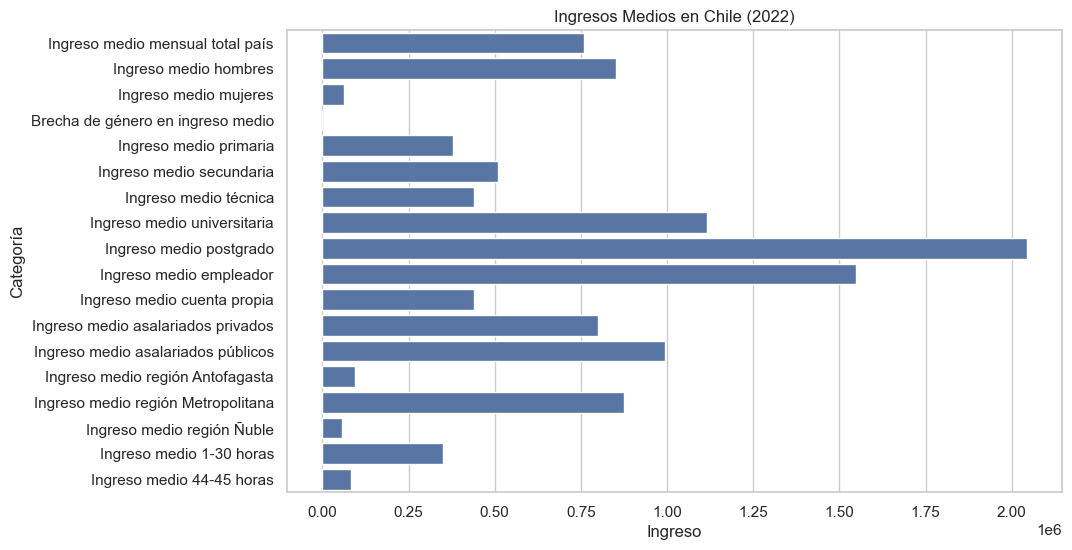

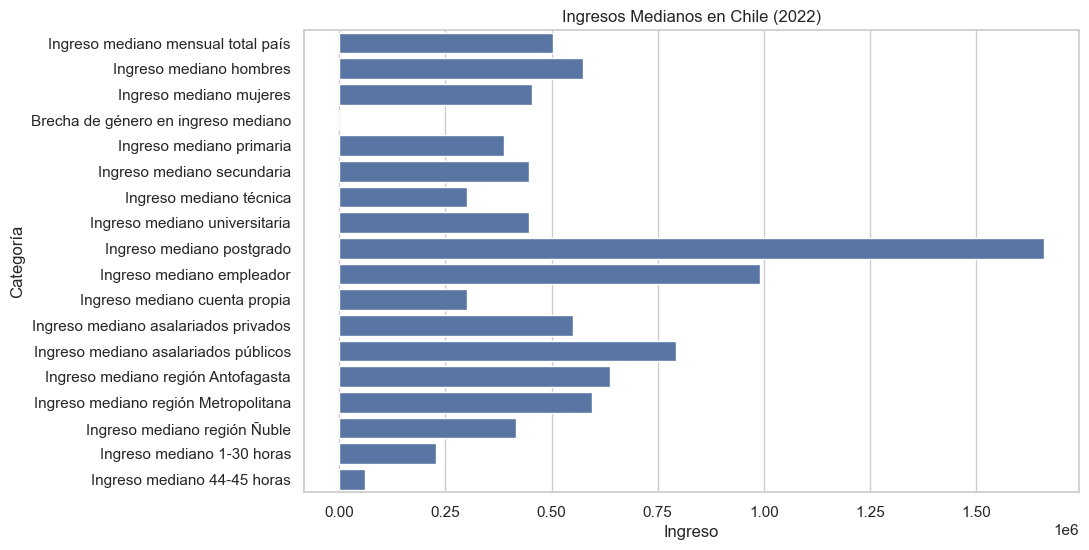

In [153]:
# Leer los datos desde el archivo CSV
df = pd.read_csv('ingresos_2022_limpios.csv')

# Separar los ingresos medios y medianos en diferentes DataFrames
df_medio = df[df['Categoria'].str.contains('medio')]
df_mediano = df[df['Categoria'].str.contains('mediano')]

# Visualización de ingresos medios
plt.figure(figsize=(10, 6))
sns.barplot(x='Valor', y='Categoria', data=df_medio)
plt.title('Ingresos Medios en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Categoría')
plt.show()

# Visualización de ingresos medianos
plt.figure(figsize=(10, 6))
sns.barplot(x='Valor', y='Categoria', data=df_mediano)
plt.title('Ingresos Medianos en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Categoría')
plt.show()

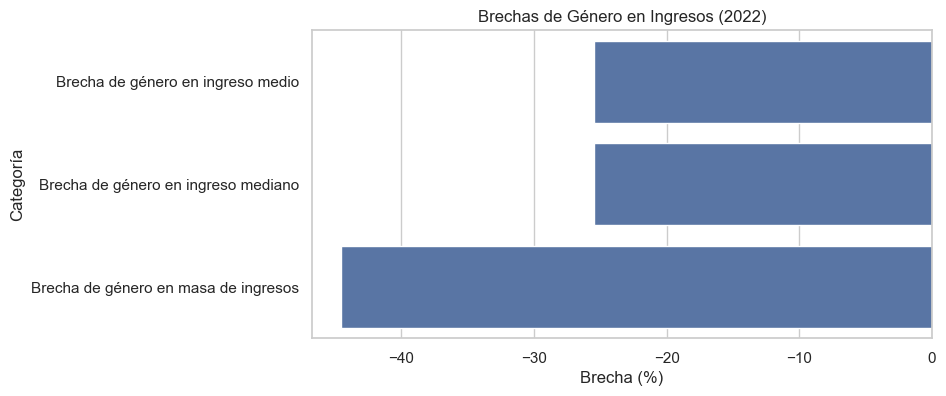

In [155]:
# Filtrar las categorías relevantes para la brecha de género
df_brechas_genero = df[df['Categoria'].str.contains('Brecha de género')]

# Visualización de brechas de género
plt.figure(figsize=(8, 4))
sns.barplot(x='Valor', y='Categoria', data=df_brechas_genero)
plt.title('Brechas de Género en Ingresos (2022)')
plt.xlabel('Brecha (%)')
plt.ylabel('Categoría')
plt.show()


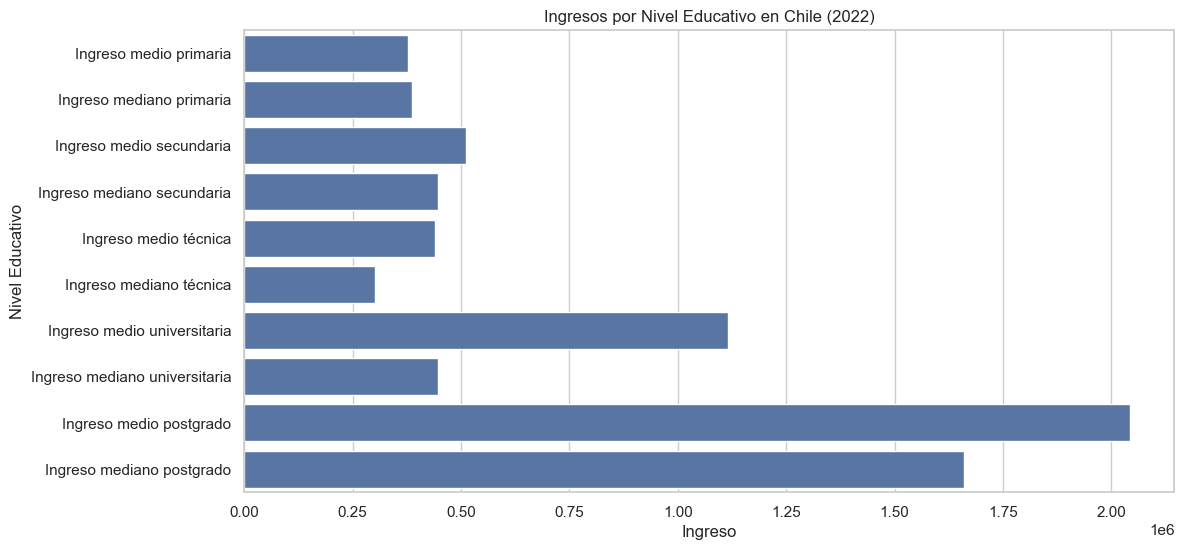

In [157]:
# Filtrar las categorías relevantes para el nivel educativo
df_nivel_educativo = df[df['Categoria'].str.contains('primaria|secundaria|técnica|universitaria|postgrado')]

# Visualización de ingresos por nivel educativo
plt.figure(figsize=(12, 6))
sns.barplot(x='Valor', y='Categoria', data=df_nivel_educativo)
plt.title('Ingresos por Nivel Educativo en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Nivel Educativo')
plt.show()

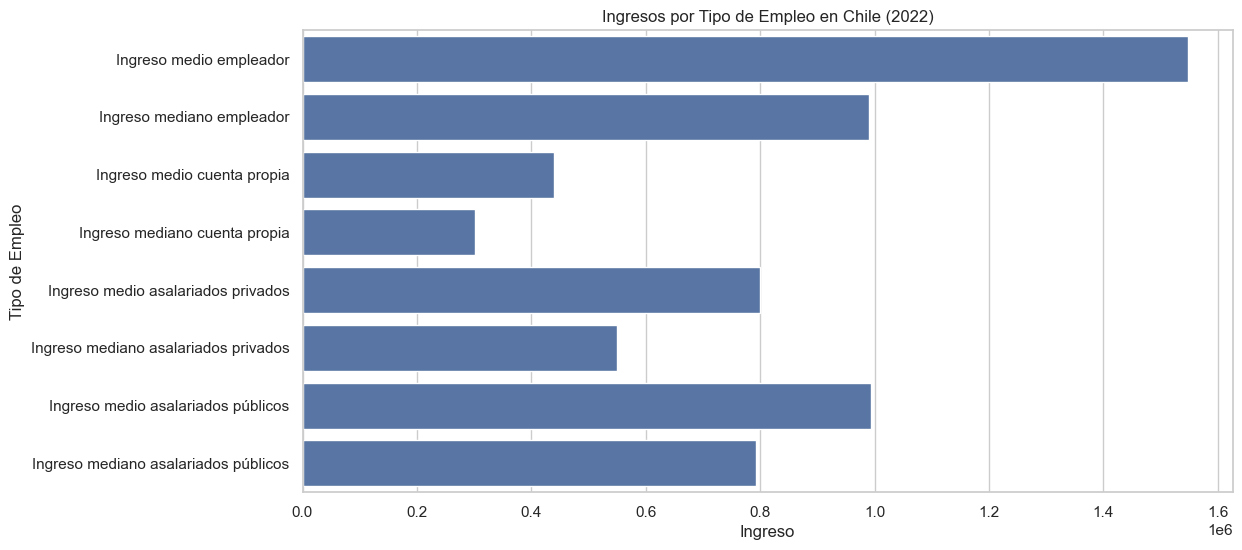

In [159]:
# Filtrar las categorías relevantes para el tipo de empleo
df_tipo_empleo = df[df['Categoria'].str.contains('empleador|cuenta propia|asalariados')]

# Visualización de ingresos por tipo de empleo
plt.figure(figsize=(12, 6))
sns.barplot(x='Valor', y='Categoria', data=df_tipo_empleo)
plt.title('Ingresos por Tipo de Empleo en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Tipo de Empleo')
plt.show()

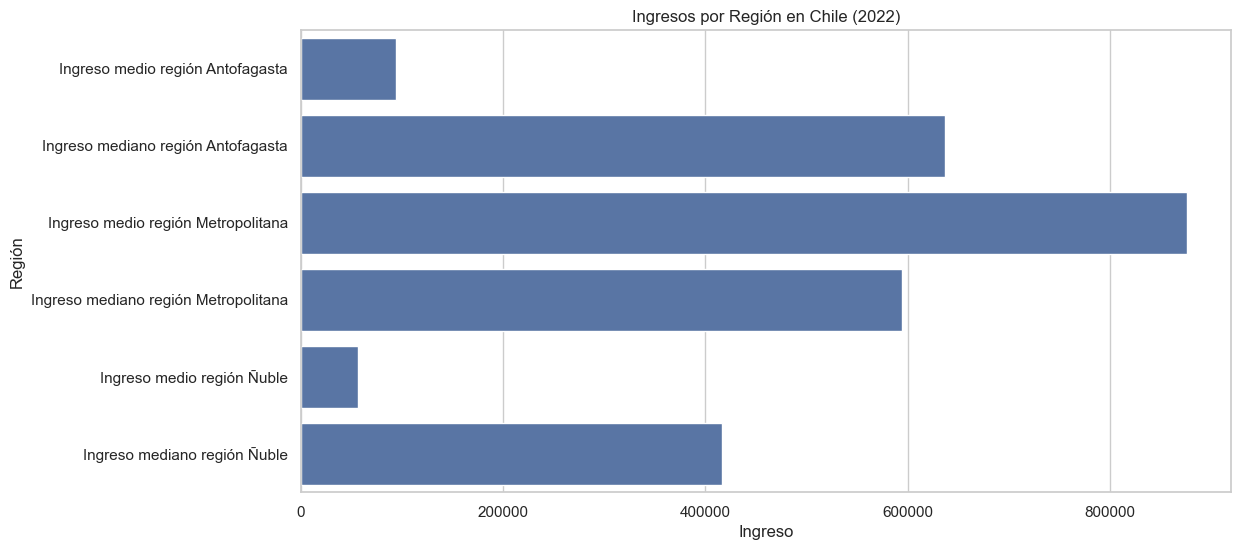

In [161]:
# Filtrar las categorías relevantes para las regiones
df_regiones = df[df['Categoria'].str.contains('región')]

# Visualización de ingresos por región
plt.figure(figsize=(12, 6))
sns.barplot(x='Valor', y='Categoria', data=df_regiones)
plt.title('Ingresos por Región en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Región')
plt.show()


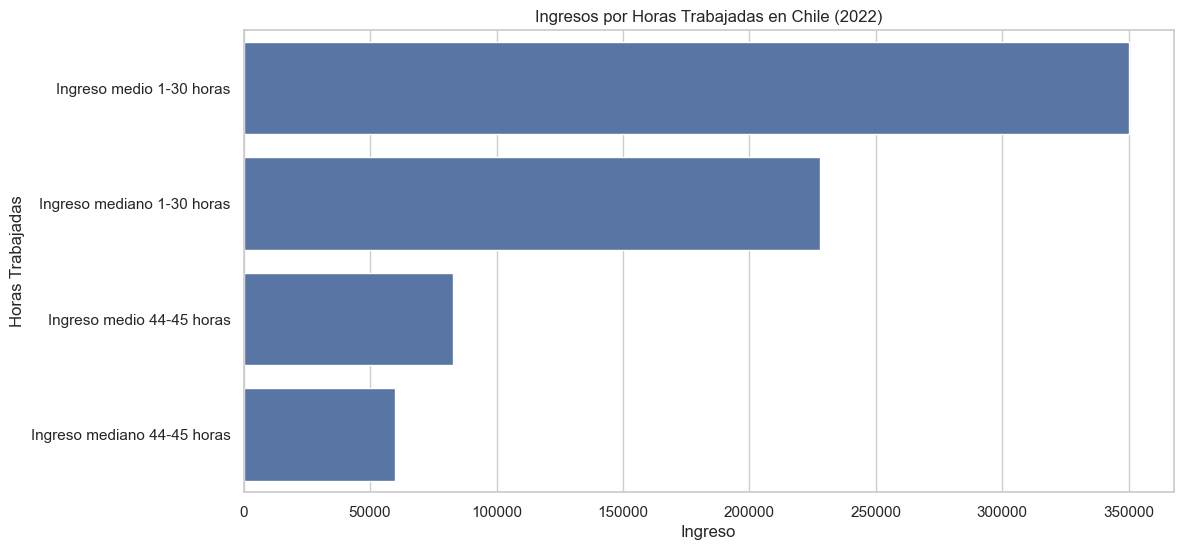

In [168]:
# Filtrar las categorías relevantes para las horas trabajadas
df_horas_trabajadas = df[df['Categoria'].str.contains('horas')]

# Visualización de ingresos por horas trabajadas
plt.figure(figsize=(12, 6))
sns.barplot(x='Valor', y='Categoria', data=df_horas_trabajadas)
plt.title('Ingresos por Horas Trabajadas en Chile (2022)')
plt.xlabel('Ingreso')
plt.ylabel('Horas Trabajadas')
plt.show()


In [163]:
# Importar las librerías necesarias
import PyPDF2

# Configuración de visualización (si la necesitas más adelante)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
'C:/Users/esteb/OneDrive/Escritorio/archivoscsvparaproyecto'

In [165]:
import zipfile
import os

# Ruta del archivo subido
zip_path = 'C:/Users/esteb/OneDrive/Escritorio/archivoscsvparaproyecto/CARPETAZIP.zip'
extracted_path = 'C:/Users/esteb/OneDrive/Escritorio/archivoscsvparaproyecto/extracted_files/'

# Crear directorio para los archivos extraídos
os.makedirs(extracted_path, exist_ok=True)

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)


In [167]:
# Listar archivos extraídos
extracted_files = os.listdir(extracted_path)
extracted_files


['general_abril_2022.csv',
 'general_abril_2023.csv',
 'general_agosto_2022.csv',
 'general_agosto_2023.csv',
 'general_diciembre_2023.csv',
 'general_enero_2022.csv',
 'general_enero_2023.csv',
 'general_febrero_2022.csv',
 'general_julio_2022.csv',
 'general_julio_2023.csv',
 'general_junio_2022.csv',
 'general_junio_2023.csv',
 'general_marzo_2022.csv',
 'general_mayo_2022.csv',
 'general_mayo_2023.csv',
 'general_noviembre_2023.csv',
 'general_octubre_2023.csv',
 'general_septiembre_2022.csv',
 'general_septiembre_2023.csv',
 'marcas_abril_2022.csv',
 'marcas_abril_2023.csv',
 'marcas_agosto_2022.csv',
 'marcas_agosto_2023.csv',
 'marcas_diciembre_2023.csv',
 'marcas_enero_2022.csv',
 'marcas_enero_2023.csv',
 'marcas_febrero_2022.csv',
 'marcas_julio_2022.csv',
 'marcas_julio_2023.csv',
 'marcas_junio_2022.csv',
 'marcas_junio_2023.csv',
 'marcas_marzo_2022.csv',
 'marcas_mayo_2022.csv',
 'marcas_mayo_2023.csv',
 'marcas_noviembre_2023.csv',
 'marcas_octubre_2023.csv',
 'marcas_se

In [169]:
general_files = [file for file in extracted_files if 'general' in file]
marcas_files = [file for file in extracted_files if 'marcas' in file]
modelos_files = [file for file in extracted_files if 'modelos' in file]
regiones_files = [file for file in extracted_files if 'regiones' in file]
segmentos_files = [file for file in extracted_files if 'segmentos' in file]


In [171]:
def combine_csv_files(file_paths, data_type):
    combined_df = pd.DataFrame()
    for file in file_paths:
        df = pd.read_csv(os.path.join(extracted_path, file))
        df['source_file'] = file  # Añadir columna para rastrear el archivo de origen
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    # Eliminar valores NaN
    combined_df.dropna(inplace=True)
    return combined_df

# Combinar archivos por tipo
combined_data = {
    'general': combine_csv_files(general_files, 'general'),
    'marcas': combine_csv_files(marcas_files, 'marcas'),
    'modelos': combine_csv_files(modelos_files, 'modelos'),
    'regiones': combine_csv_files(regiones_files, 'regiones'),
    'segmentos': combine_csv_files(segmentos_files, 'segmentos')
}


In [258]:
# Mostrar una muestra de cada DataFrame combinado
for key, df in combined_data.items():
    print(f"Data de {key}:")
    display(df.head(60))


Data de general:


,Categoría,Valor,source_file
17,Cambio respecto enero 2022,-25.9,general_enero_2023.csv
0,Total ventas abril 2022,37867.0,general_abril_2022.csv
2,Total ventas acumuladas a abril 2022,148360.0,general_abril_2022.csv
4,Total ventas acumuladas a abril 2023,110919.0,general_abril_2023.csv
8,Total ventas acumuladas a agosto 2022,295777.0,general_agosto_2022.csv
10,Total ventas acumuladas a agosto 2023,210576.0,general_agosto_2023.csv
12,Total ventas acumuladas a diciembre 2023,313865.0,general_diciembre_2023.csv
20,Total ventas acumuladas a febrero 2022,69026.0,general_febrero_2022.csv
24,Total ventas acumuladas a julio 2022,260759.0,general_julio_2022.csv
26,Total ventas acumuladas a julio 2023,182262.0,general_julio_2023.csv


Data de marcas:


,Marca,Vehículo de Pasajeros,SUV,Camioneta,Vehículo Comercial,Total,source_file
176,BMW,124.0,148.0,0.0,0.0,272,marcas_mayo_2023.csv
116,CHANGAN,205.0,939.0,427.0,341.0,1912,marcas_junio_2022.csv
60,CHANGAN,152.0,721.0,162.0,342.0,1377,marcas_enero_2022.csv
188,CHANGAN,63.0,583.0,117.0,99.0,862,marcas_noviembre_2023.csv
161,CHANGAN,104.0,484.0,193.0,76.0,857,marcas_mayo_2023.csv
88,CHANGAN,189.0,1071.0,60.0,97.0,1417,marcas_febrero_2022.csv
144,CHANGAN,251.0,1845.0,177.0,69.0,2342,marcas_mayo_2022.csv
95,CHANGAN,276.0,1127.0,280.0,272.0,1955,marcas_julio_2022.csv
24,CHANGAN,183.0,1306.0,213.0,166.0,1868,marcas_agosto_2022.csv
79,CHERY,2.0,1293.0,0.0,0.0,1295,marcas_enero_2023.csv


Data de modelos:


,Modelo,Marca,Ventas,source_file
259,2008,PEUGEOT,396,modelos_suv_enero_2022.csv
278,2008,PEUGEOT,335,modelos_suv_febrero_2022.csv
269,2008,PEUGEOT,257,modelos_suv_enero_2023.csv
177,208,PEUGEOT,224,modelos_pasajeros_octubre_2023.csv
27,208,PEUGEOT,80,modelos_pasajeros_abril_2023.csv
74,208,PEUGEOT,350,modelos_pasajeros_enero_2023.csv
157,208,PEUGEOT,147,modelos_pasajeros_mayo_2023.csv
108,208,PEUGEOT,159,modelos_pasajeros_julio_2023.csv
47,208,PEUGEOT,273,modelos_pasajeros_agosto_2023.csv
167,208,PEUGEOT,164,modelos_pasajeros_noviembre_2023.csv


Data de regiones:


,Región,Total Ventas,Participación %,Variación %,source_file
66,Antofagasta,813,3.0,-13.2,regiones_diciembre_2023.csv
75,Araucanía,828,3.1,-19.5,regiones_diciembre_2023.csv
64,Arica y Parinacota,99,0.4,-7.5,regiones_diciembre_2023.csv
67,Atacama,304,1.1,-22.4,regiones_diciembre_2023.csv
74,Bío Bío,1907,7.0,-9.6,regiones_diciembre_2023.csv
68,Coquimbo,840,3.1,-18.0,regiones_diciembre_2023.csv
78,General Carlos Ibáñez del Campo,121,0.4,11.0,regiones_diciembre_2023.csv
145,I - Tarapacá,199,0.9,-22.9,regiones_julio_2023.csv
33,I - Tarapacá,229,0.6,-22.9,regiones_agosto_2022.csv
209,I - Tarapacá,273,0.7,16.7,regiones_mayo_2022.csv


Data de segmentos:


,Segmento,Abril 2021,Abril 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum,source_file,Abril 2023,Agosto 2021,...,Mayo 2021,Mayo 2022,Mayo 2023,Noviembre 2022,Noviembre 2023,Octubre 2022,Octubre 2023,Septiembre 2021,Septiembre 2022,Septiembre 2023


In [175]:
# Función para limpiar y organizar DataFrames
def clean_dataframe(df):
    # Eliminar valores NaN
    df.dropna(inplace=True)
    # Ordenar por la primera columna (si aplica)
    df = df.sort_values(by=df.columns[0])
    return df

# Limpiar y organizar cada DataFrame
for key in combined_data:
    combined_data[key] = clean_dataframe(combined_data[key])

# Mostrar todos los datos combinados
for key, df in combined_data.items():
    print(f"Data de {key}:")
    display(df)


Data de general:


,Categoría,Valor,source_file
17,Cambio respecto enero 2022,-25.9,general_enero_2023.csv
0,Total ventas abril 2022,37867.0,general_abril_2022.csv
2,Total ventas acumuladas a abril 2022,148360.0,general_abril_2022.csv
4,Total ventas acumuladas a abril 2023,110919.0,general_abril_2023.csv
8,Total ventas acumuladas a agosto 2022,295777.0,general_agosto_2022.csv
10,Total ventas acumuladas a agosto 2023,210576.0,general_agosto_2023.csv
12,Total ventas acumuladas a diciembre 2023,313865.0,general_diciembre_2023.csv
20,Total ventas acumuladas a febrero 2022,69026.0,general_febrero_2022.csv
24,Total ventas acumuladas a julio 2022,260759.0,general_julio_2022.csv
26,Total ventas acumuladas a julio 2023,182262.0,general_julio_2023.csv


Data de marcas:


,Marca,Vehículo de Pasajeros,SUV,Camioneta,Vehículo Comercial,Total,source_file
176,BMW,124.0,148.0,0.0,0.0,272,marcas_mayo_2023.csv
116,CHANGAN,205.0,939.0,427.0,341.0,1912,marcas_junio_2022.csv
60,CHANGAN,152.0,721.0,162.0,342.0,1377,marcas_enero_2022.csv
188,CHANGAN,63.0,583.0,117.0,99.0,862,marcas_noviembre_2023.csv
161,CHANGAN,104.0,484.0,193.0,76.0,857,marcas_mayo_2023.csv
...,...,...,...,...,...,...,...
120,TOYOTA,280.0,955.0,944.0,5.0,2184,marcas_junio_2023.csv
70,TOYOTA,286.0,1200.0,771.0,13.0,2270,marcas_enero_2023.csv
140,TOYOTA,696.0,1994.0,921.0,3.0,3614,marcas_mayo_2022.csv
166,VOLKSWAGEN,155.0,288.0,143.0,0.0,586,marcas_mayo_2023.csv


Data de modelos:


,Modelo,Marca,Ventas,source_file
259,2008,PEUGEOT,396,modelos_suv_enero_2022.csv
278,2008,PEUGEOT,335,modelos_suv_febrero_2022.csv
269,2008,PEUGEOT,257,modelos_suv_enero_2023.csv
177,208,PEUGEOT,224,modelos_pasajeros_octubre_2023.csv
27,208,PEUGEOT,80,modelos_pasajeros_abril_2023.csv
...,...,...,...,...
112,YARIS,TOYOTA,652,modelos_pasajeros_junio_2022.csv
123,YARIS,TOYOTA,251,modelos_pasajeros_junio_2023.csv
43,YARIS,TOYOTA,338,modelos_pasajeros_agosto_2023.csv
62,YARIS,TOYOTA,647,modelos_pasajeros_enero_2022.csv


Data de regiones:


,Región,Total Ventas,Participación %,Variación %,source_file
66,Antofagasta,813,3.0,-13.2,regiones_diciembre_2023.csv
75,Araucanía,828,3.1,-19.5,regiones_diciembre_2023.csv
64,Arica y Parinacota,99,0.4,-7.5,regiones_diciembre_2023.csv
67,Atacama,304,1.1,-22.4,regiones_diciembre_2023.csv
74,Bío Bío,1907,7.0,-9.6,regiones_diciembre_2023.csv
...,...,...,...,...,...
153,XVI - Ñuble,321,1.4,-48.2,regiones_julio_2023.csv
281,XVI - Ñuble,1533,4.2,0.3,regiones_septiembre_2022.csv
89,XVI - Ñuble,1417,3.8,21.4,regiones_enero_2022.csv
169,XVI - Ñuble,1533,4.2,0.3,regiones_junio_2022.csv


Data de segmentos:


,Segmento,Abril 2021,Abril 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum,source_file,Abril 2023,Agosto 2021,...,Mayo 2021,Mayo 2022,Mayo 2023,Noviembre 2022,Noviembre 2023,Octubre 2022,Octubre 2023,Septiembre 2021,Septiembre 2022,Septiembre 2023


In [260]:
# Directorio donde deseas guardar los archivos CSV
output_dir = "C:/Users/esteb/Proyecto/CombinedData"

# Crear el directorio si no existe
os.makedirs(output_dir, exist_ok=True)

# Guardar cada DataFrame en un archivo CSV
for key, df in combined_data.items():
    output_file = os.path.join(output_dir, f"{key}_combined.csv")
    df.to_csv(output_file, index=False)
    print(f"DataFrame de {key} guardado en {output_file}")

DataFrame de general guardado en C:/Users/esteb/Proyecto/CombinedData\general_combined.csv
DataFrame de marcas guardado en C:/Users/esteb/Proyecto/CombinedData\marcas_combined.csv
DataFrame de modelos guardado en C:/Users/esteb/Proyecto/CombinedData\modelos_combined.csv
DataFrame de regiones guardado en C:/Users/esteb/Proyecto/CombinedData\regiones_combined.csv
DataFrame de segmentos guardado en C:/Users/esteb/Proyecto/CombinedData\segmentos_combined.csv


In [177]:
# Concatenar todos los DataFrames combinados
combined_df = pd.concat(combined_data.values(), ignore_index=True)

# Guardar el DataFrame combinado en un archivo CSV
combined_df.to_csv('C:/Users/esteb/OneDrive/Escritorio/archivoscsvparaproyecto/combined_data.csv', index=False)


In [179]:
# Revisar las primeras filas del DataFrame de segmentos
print(combined_data['segmentos'].head())

# Mostrar todas las columnas del DataFrame de segmentos
print(combined_data['segmentos'].columns)


Empty DataFrame
Columns: [Segmento, Abril 2021, Abril 2022, Variación %, Acumulado 2021, Acumulado 2022, Variación % Acum, source_file, Abril 2023, Agosto 2021, Agosto 2022, Agosto 2023, Diciembre 2022, Diciembre 2023, Enero 2021, Enero 2022, Enero 2023, Febrero 2021, Febrero 2022, Julio 2021, Julio 2022, Julio 2023, Junio 2021, Junio 2022, Junio 2023, Marzo 2021, Marzo 2022, Mayo 2021, Mayo 2022, Mayo 2023, Noviembre 2022, Noviembre 2023, Octubre 2022, Octubre 2023, Septiembre 2021, Septiembre 2022, Septiembre 2023]
Index: []

[0 rows x 37 columns]
Index(['Segmento', 'Abril 2021', 'Abril 2022', 'Variación %', 'Acumulado 2021',
       'Acumulado 2022', 'Variación % Acum', 'source_file', 'Abril 2023',
       'Agosto 2021', 'Agosto 2022', 'Agosto 2023', 'Diciembre 2022',
       'Diciembre 2023', 'Enero 2021', 'Enero 2022', 'Enero 2023',
       'Febrero 2021', 'Febrero 2022', 'Julio 2021', 'Julio 2022',
       'Julio 2023', 'Junio 2021', 'Junio 2022', 'Junio 2023', 'Marzo 2021',
       'M

In [250]:
# Revisar los primeros archivos de segmentos para entender la estructura original
for file in segmentos_files:
    df = pd.read_csv(os.path.join(extracted_path, file))
    print(f"Archivo: {file}")
    display(df.head(40))

Archivo: segmentos_abril_2022.csv


,Segmento,Abril 2021,Abril 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,6273,9624,53.4,33346,38150,14.4
1,SUV,13089,17214,31.5,45583,65162,43.0
2,Camioneta,4201,6738,60.4,17018,27561,62.0
3,Vehículo Comercial,3678,4291,16.7,13280,17487,31.7
4,Total,27241,37867,39.0,109227,148360,35.8


Archivo: segmentos_abril_2023.csv


,Segmento,Abril 2022,Abril 2023,Variación %
0,Vehículo de Pasajeros,9621,4988,-48.2
1,SUV,17217,9385,-45.5
2,Camioneta,6738,3172,-52.9
3,Vehículo Comercial,4291,1977,-53.9
4,Total,37867,19522,-48.4


Archivo: segmentos_agosto_2022.csv


,Segmento,Agosto 2021,Agosto 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,10267,9487,-7.6,76654,75514,-1.5
1,SUV,17319,15305,-11.6,107107,131433,22.7
2,Camioneta,6185,7006,13.3,42679,56837,33.2
3,Vehículo Comercial,3793,3220,-15.1,28206,31993,13.4
4,Total,37564,35018,-6.8,254646,295777,16.2


Archivo: segmentos_agosto_2023.csv


,Segmento,Agosto 2022,Agosto 2023,Variación %
0,Vehículo de Pasajeros,9487,5991,-36.9
1,SUV,15305,15018,-1.9
2,Camioneta,7006,5095,-27.3
3,Vehículo Comercial,3220,2210,-31.4
4,Total,35018,28314,-19.1


Archivo: segmentos_diciembre_2023.csv


,Segmento,Diciembre 2022,Diciembre 2023,Variación %
0,Vehículo de Pasajeros,7158,5433,-24.1
1,SUV,14741,12621,-25.8
2,Camioneta,8446,6386,-24.4
3,Vehículo Comercial,3587,2663,-25.8
4,Total,33932,27103,-20.1


Archivo: segmentos_enero_2022.csv


,Segmento,Enero 2021,Enero 2022,Variación %
0,Vehículo de Pasajeros,9151,10641,16.3
1,SUV,9569,14461,51.1
2,Camioneta,3790,7208,90.2
3,Vehículo Comercial,2474,4971,100.9
4,Total,24984,37281,49.2


Archivo: segmentos_enero_2023.csv


,Segmento,Enero 2022,Enero 2023,Variación %
0,Vehículo de Pasajeros,10649,5760,-45.9
1,SUV,14453,12244,-15.3
2,Camioneta,7208,6867,-4.7
3,Vehículo Comercial,4971,2746,-44.8
4,Total,37281,27617,-25.9


Archivo: segmentos_febrero_2022.csv


,Segmento,Febrero 2021,Febrero 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,7966,7315,-8.2,17117,17956,4.9
1,SUV,9415,14688,56.0,18984,29149,53.5
2,Camioneta,3857,5905,53.1,7647,13113,71.5
3,Vehículo Comercial,3253,3837,18.0,5727,8808,53.8
4,Total,24491,31745,29.6,49475,69026,39.5


Archivo: segmentos_julio_2022.csv


,Segmento,Julio 2021,Julio 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,12301,9103,-26.0,66387,66027,-0.5
1,SUV,15859,17122,8.0,89788,116128,29.3
2,Camioneta,6524,8427,29.2,36494,49831,36.5
3,Vehículo Comercial,3542,3654,3.2,24413,28773,17.9
4,Total,38226,38306,0.2,217082,260759,20.1


Archivo: segmentos_julio_2023.csv


,Segmento,Julio 2022,Julio 2023,Variación %
0,Vehículo de Pasajeros,7125,4580,-35.7
1,SUV,10770,8153,-24.3
2,Camioneta,5160,4130,-20.0
3,Vehículo Comercial,2400,1991,-17.0
4,Total,25455,18854,-25.9


Archivo: segmentos_junio_2022.csv


,Segmento,Junio 2021,Junio 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,11323,9294,-17.9,54086,56924,5.2
1,SUV,13682,16415,20.0,73929,99006,33.9
2,Camioneta,6642,7061,6.3,29970,41404,38.2
3,Vehículo Comercial,3852,3436,-10.8,20871,25119,20.4
4,Total,35499,36206,2.0,178856,222453,24.4


Archivo: segmentos_junio_2023.csv


,Segmento,Junio 2022,Junio 2023,Variación %
0,Vehículo de Pasajeros,9294,4744,-49.0
1,SUV,16415,10740,-34.6
2,Camioneta,7061,4809,-31.9
3,Vehículo Comercial,3436,2383,-30.6
4,Total,36206,22676,-37.4


Archivo: segmentos_marzo_2022.csv


,Segmento,Marzo 2021,Marzo 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,9956,10908,9.6,27073,28864,6.6
1,SUV,13510,18461,36.6,32494,47610,46.5
2,Camioneta,5170,7710,49.1,12817,20823,62.5
3,Vehículo Comercial,3875,4388,13.2,9602,13196,37.4
4,Total,32511,41467,27.5,81986,110493,34.8


Archivo: segmentos_mayo_2022.csv


,Segmento,Mayo 2021,Mayo 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,9417,9492,0.8,42763,47642,11.4
1,SUV,14664,17417,18.8,60247,82579,37.1
2,Camioneta,6310,6782,7.5,23328,34343,47.2
3,Vehículo Comercial,3739,4196,12.2,17019,21683,27.4
4,Total,34130,37887,11.0,143357,186247,29.9


Archivo: segmentos_mayo_2023.csv


,Segmento,Mayo 2022,Mayo 2023,Variación %
0,Vehículo de Pasajeros,9487,5680,-40.1
1,SUV,17422,11982,-31.2
2,Camioneta,6782,5279,-22.2
3,Vehículo Comercial,4196,2675,-36.2
4,Total,37887,25616,-32.4


Archivo: segmentos_noviembre_2023.csv


,Segmento,Noviembre 2022,Noviembre 2023,Variación %
0,Vehículo de Pasajeros,7105,5707,-19.7
1,SUV,14605,12259,-16.1
2,Camioneta,6765,5360,-20.8
3,Vehículo Comercial,3233,2304,-28.7
4,Total,31708,25630,-19.2


Archivo: segmentos_octubre_2023.csv


,Segmento,Octubre 2022,Octubre 2023,Variación %
0,Vehículo de Pasajeros,5865,5844,-0.4
1,SUV,12917,11471,-11.2
2,Camioneta,6966,5349,-23.2
3,Vehículo Comercial,2894,2389,-17.4
4,Total,28642,25053,-12.5


Archivo: segmentos_septiembre_2022.csv


,Segmento,Septiembre 2021,Septiembre 2022,Variación %,Acumulado 2021,Acumulado 2022,Variación % Acum
0,Vehículo de Pasajeros,10723,9544,-11.0,87377,85058,-2.7
1,SUV,19287,15777,-18.2,126394,147210,16.5
2,Camioneta,8639,8544,-1.1,51318,65381,27.4
3,Vehículo Comercial,3978,2853,-28.3,32184,34846,8.3
4,Total,42627,36718,-13.9,297273,332495,11.8


Archivo: segmentos_septiembre_2023.csv


,Segmento,Septiembre 2022,Septiembre 2023,Variación %
0,Vehículo de Pasajeros,9544,5341,-44.0
1,SUV,15777,12610,-19.5
2,Camioneta,8544,5256,-38.5
3,Vehículo Comercial,2853,2296,-20.1
4,Total,36718,25503,-30.5


In [188]:
# Rutas a los archivos CSV
pib_data_path = 'C:/Users/esteb/Proyecto/pib_historico_act.csv'
ipc_data_path = 'C:/Users/esteb/Proyecto/ipc_historico_act.csv'
unemployment_data_path = 'C:/Users/esteb/Proyecto/Desempleo_limpio_actualizado.csv'
sales_data_path = 'C:/Users/esteb/Proyecto/sales_data.csv'  # Asegúrate de tener el archivo de ventas en la ruta especificada

Columnas disponibles en merged_df: Index(['Fecha', 'Ventas_Vehiculos', 'Var_Anual', 'Var_Trimestral',
       'IPC_Variacion', 'Nacional'],
      dtype='object')


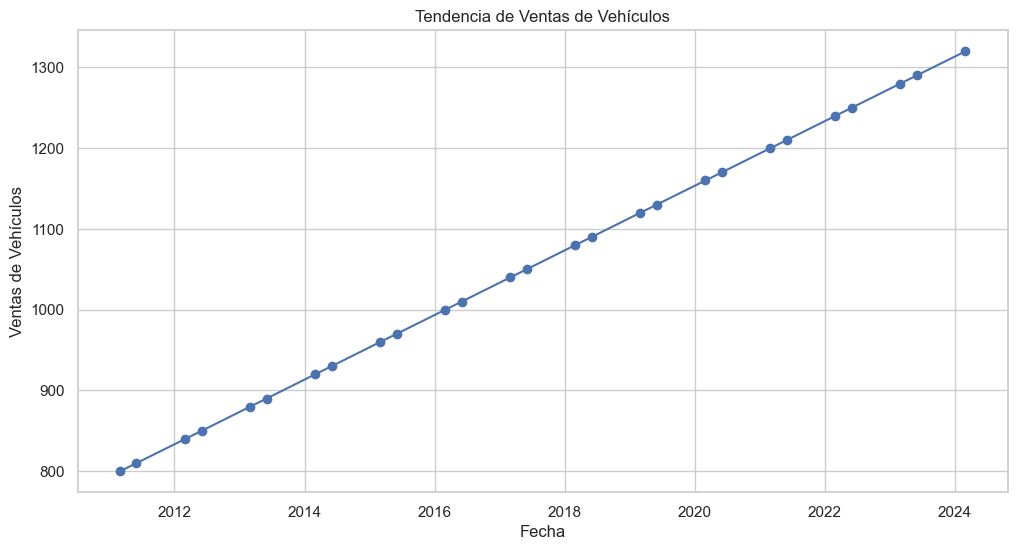

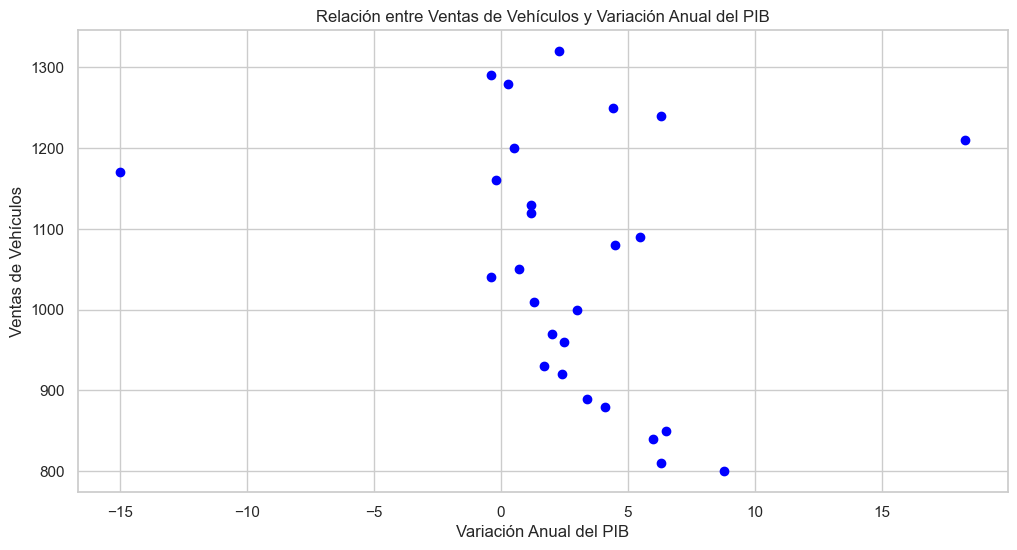

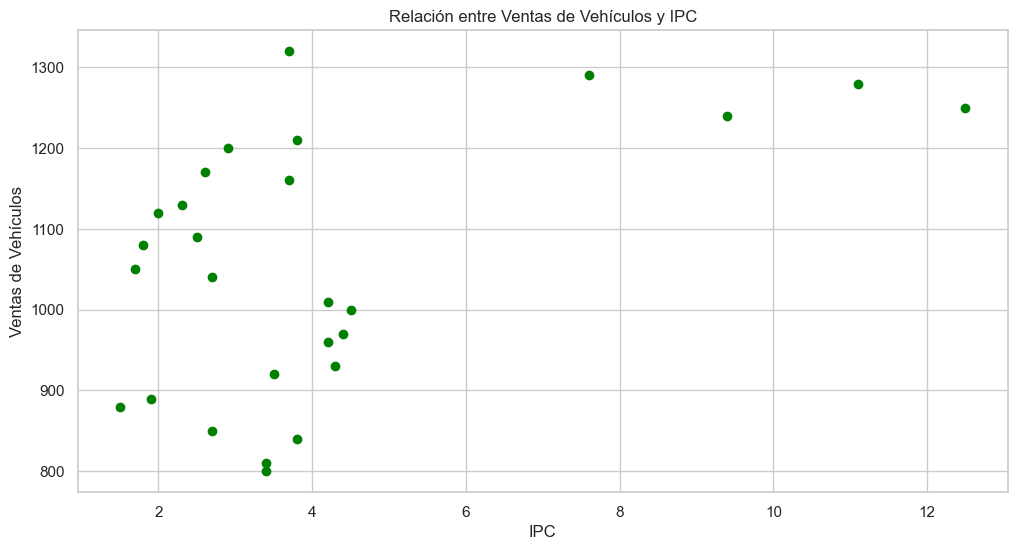

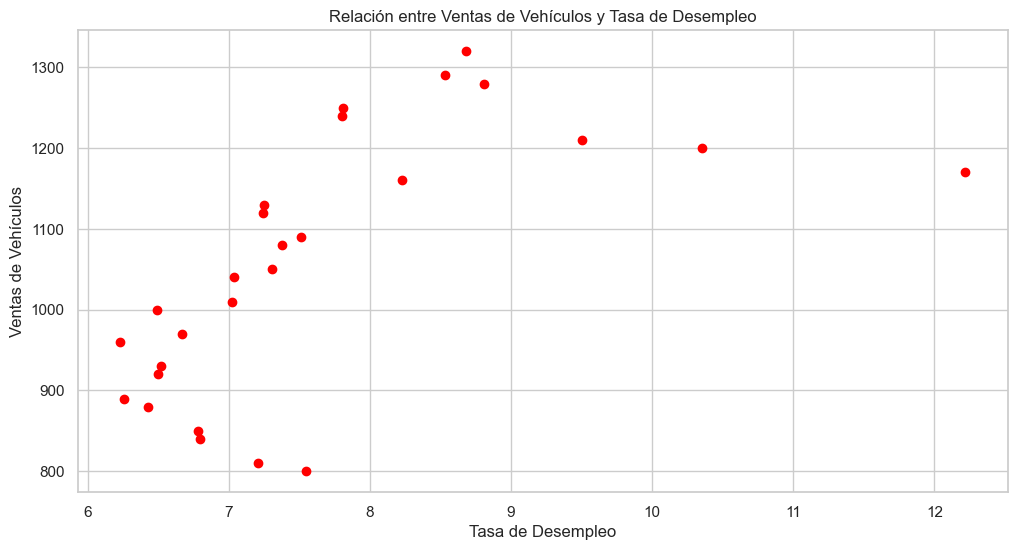

In [222]:
# Rutas a los archivos CSV
pib_data_path = 'C:/Users/esteb/Proyecto/pib_historico_act.csv'
ipc_data_path = 'C:/Users/esteb/Proyecto/ipc_historico_act.csv'
unemployment_data_path = 'C:/Users/esteb/Proyecto/Desempleo_limpio_actualizado.csv'

# Función para cargar datos y manejar errores
def load_data(file_path, date_col='Fecha'):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Asegurarse de que la columna de fecha exista y esté correctamente nombrada
        if date_col not in df.columns:
            print(f"Error: La columna '{date_col}' no se encontró en el archivo {file_path}")
            print(f"Columnas disponibles: {df.columns.tolist()}")
        return df
    else:
        print(f"Error: No se encontró el archivo {file_path}")
        return pd.DataFrame()

# Cargar los datos en DataFrames
pib_data = load_data(pib_data_path)
ipc_data = load_data(ipc_data_path)
unemployment_data = load_data(unemployment_data_path, date_col='Periodo')

# Verificar que los datos se hayan cargado correctamente
if pib_data.empty or ipc_data.empty or unemployment_data.empty:
    print("No se pudieron cargar todos los archivos de datos. Por favor, verifica las rutas y los nombres de los archivos.")
else:
    # Convertir las columnas de fecha a tipo datetime si existen
    if 'Fecha' in pib_data.columns:
        pib_data['Fecha'] = pd.to_datetime(pib_data['Fecha'])
    if 'Fecha' in ipc_data.columns:
        ipc_data['Fecha'] = pd.to_datetime(ipc_data['Fecha'])
    if 'Periodo' in unemployment_data.columns:
        # Mapeo de meses en español a inglés
        month_map = {
            'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
            'jul': 'Jul', 'ago': 'Aug', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
        }
        # Reemplazar los nombres de los meses en español por los equivalentes en inglés
        unemployment_data['Fecha'] = unemployment_data['Periodo'].replace(month_map, regex=True)
        # Convertir la columna 'Fecha' a tipo datetime
        unemployment_data['Fecha'] = pd.to_datetime(unemployment_data['Fecha'], format='%b.%Y')

    # Crear datos simulados de ventas de vehículos
    sales_data = pd.DataFrame({
        'Fecha': pib_data['Fecha'],  # Usar las fechas del PIB para mantener la consistencia
        'Ventas_Vehiculos': [200 + i*10 for i in range(len(pib_data))]  # Datos simulados de ventas
    })

    # Unir los datos en un solo DataFrame
    merged_df = sales_data
    if 'Fecha' in pib_data.columns:
        merged_df = merged_df.merge(pib_data, on='Fecha')
    if 'Fecha' in ipc_data.columns:
        merged_df = merged_df.merge(ipc_data, on='Fecha')
    if 'Fecha' in unemployment_data.columns:
        merged_df = merged_df.merge(unemployment_data[['Fecha', 'Nacional']], on='Fecha')

    # Imprimir las columnas del DataFrame combinado
    print("Columnas disponibles en merged_df:", merged_df.columns)

    # Visualización de la Tendencia de Ventas de Vehículos
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['Fecha'], merged_df['Ventas_Vehiculos'], marker='o')
    plt.title('Tendencia de Ventas de Vehículos')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas de Vehículos')
    plt.grid(True)
    plt.show()

    # Visualización de la Relación entre Ventas de Vehículos y Variación Anual del PIB
    plt.figure(figsize=(12, 6))
    plt.scatter(merged_df['Var_Anual'], merged_df['Ventas_Vehiculos'], c='blue')
    plt.title('Relación entre Ventas de Vehículos y Variación Anual del PIB')
    plt.xlabel('Variación Anual del PIB')
    plt.ylabel('Ventas de Vehículos')
    plt.grid(True)
    plt.show()

    # Visualización de la Relación entre Ventas de Vehículos y IPC
    plt.figure(figsize=(12, 6))
    plt.scatter(merged_df['IPC_Variacion'], merged_df['Ventas_Vehiculos'], c='green')
    plt.title('Relación entre Ventas de Vehículos y IPC')
    plt.xlabel('IPC')
    plt.ylabel('Ventas de Vehículos')
    plt.grid(True)
    plt.show()

    # Visualización de la Relación entre Ventas de Vehículos y la Tasa de Desempleo
    plt.figure(figsize=(12, 6))
    plt.scatter(merged_df['Nacional'], merged_df['Ventas_Vehiculos'], c='red')
    plt.title('Relación entre Ventas de Vehículos y Tasa de Desempleo')
    plt.xlabel('Tasa de Desempleo')
    plt.ylabel('Ventas de Vehículos')
    plt.grid(True)
    plt.show()


In [344]:
# Rutas de los archivos que existen según la información proporcionada
pib_data_path = 'C:/Users/esteb/Proyecto/pib_historico_act.csv'
ipc_data_path = 'C:/Users/esteb/Proyecto/ipc_historico_act.csv'
unemployment_data_path = 'C:/Users/esteb/Proyecto/Desempleo_limpio_actualizado.csv'
combined_data_path = 'C:/Users/esteb/Proyecto/combined_data.csv'

# Cargar los datos en DataFrames
pib_data = pd.read_csv(pib_data_path)
ipc_data = pd.read_csv(ipc_data_path)
unemployment_data = pd.read_csv(unemployment_data_path)
combined_data = pd.read_csv(combined_data_path)

# Convertir las columnas de fecha a tipo datetime si existen
if 'Fecha' in pib_data.columns:
    pib_data['Fecha'] = pd.to_datetime(pib_data['Fecha'])
if 'Fecha' in ipc_data.columns:
    ipc_data['Fecha'] = pd.to_datetime(ipc_data['Fecha'])
if 'Periodo' in unemployment_data.columns:
    # Mapeo de meses en español a inglés
    month_map = {
        'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
        'jul': 'Jul', 'ago': 'Aug', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
    }
    # Reemplazar los nombres de los meses en español por los equivalentes en inglés
    unemployment_data['Fecha'] = unemployment_data['Periodo'].replace(month_map, regex=True)
    # Convertir la columna 'Fecha' a tipo datetime
    unemployment_data['Fecha'] = pd.to_datetime(unemployment_data['Fecha'], format='%b.%Y')

# Verificar las primeras filas de cada DataFrame
print("PIB Data:\n", pib_data.head())
print("IPC Data:\n", ipc_data.head())
print("Unemployment Data:\n", unemployment_data.head())

# Verificar las columnas disponibles en el DataFrame combinado
print("Columnas disponibles en combined_data:", combined_data.columns)

# Crear el DataFrame de ventas de vehículos
sales_columns = ['Abril 2021', 'Abril 2022', 'Abril 2023', 'Agosto 2021', 'Agosto 2022', 'Agosto 2023', 
                 'Diciembre 2022', 'Diciembre 2023', 'Enero 2021', 'Enero 2022', 'Enero 2023', 
                 'Febrero 2021', 'Febrero 2022', 'Julio 2021', 'Julio 2022', 'Julio 2023', 
                 'Junio 2021', 'Junio 2022', 'Junio 2023', 'Marzo 2021', 'Marzo 2022', 
                 'Mayo 2021', 'Mayo 2022', 'Mayo 2023', 'Noviembre 2022', 'Noviembre 2023', 
                 'Octubre 2022', 'Octubre 2023', 'Septiembre 2021', 'Septiembre 2022', 'Septiembre 2023']

# Extraer datos de ventas
sales_data = combined_data[sales_columns].T

# Crear un diccionario de mapeo de meses en español a inglés
month_map = {
    'Enero': 'Jan', 'Febrero': 'Feb', 'Marzo': 'Mar', 'Abril': 'Apr', 'Mayo': 'May', 'Junio': 'Jun',
    'Julio': 'Jul', 'Agosto': 'Aug', 'Septiembre': 'Sep', 'Octubre': 'Oct', 'Noviembre': 'Nov', 'Diciembre': 'Dec'
}

# Reemplazar los nombres de los meses en español por los equivalentes en inglés
sales_data.index = sales_data.index.to_series().replace(month_map, regex=True)

# Convertir el índice a fechas válidas
sales_data.index = pd.to_datetime(sales_data.index + ' 01', format='%b %Y %d')

# Reorganizar y limpiar los datos de ventas
sales_data = sales_data.stack().reset_index()
sales_data.columns = ['Fecha', 'Index', 'Ventas_Vehiculos']
sales_data.drop('Index', axis=1, inplace=True)

# Verificar las primeras filas del DataFrame de ventas
print("Sales Data:\n", sales_data.head())

# Crear un rango de fechas completo que incluya las fechas de ventas
all_dates = pd.date_range(start=min(sales_data['Fecha'].min(), pib_data['Fecha'].min(), ipc_data['Fecha'].min(), unemployment_data['Fecha'].min()),
                          end=max(sales_data['Fecha'].max(), pib_data['Fecha'].max(), ipc_data['Fecha'].max(), unemployment_data['Fecha'].max()),
                          freq='MS')

# Reindexar los DataFrames al rango completo de fechas
pib_data = pib_data.set_index('Fecha').reindex(all_dates).interpolate(method='linear').reset_index().rename(columns={'index': 'Fecha'})
ipc_data = ipc_data.set_index('Fecha').reindex(all_dates).interpolate(method='linear').reset_index().rename(columns={'index': 'Fecha'})
unemployment_data = unemployment_data.set_index('Fecha').reindex(all_dates).infer_objects().interpolate(method='linear').reset_index().rename(columns={'index': 'Fecha'})

# Unir los datos en un solo DataFrame
merged_df = sales_data
if 'Fecha' in pib_data.columns:
    merged_df = merged_df.merge(pib_data, on='Fecha', how='left')
if 'Fecha' in ipc_data.columns:
    merged_df = merged_df.merge(ipc_data, on='Fecha', how='left')
if 'Fecha' in unemployment_data.columns:
    merged_df = merged_df.merge(unemployment_data[['Fecha', 'Nacional']], on='Fecha', how='left')

# Verificar las primeras filas del DataFrame combinado
print("Merged DataFrame:\n", merged_df.head())

# Imprimir las columnas del DataFrame combinado
print("Columnas disponibles en merged_df:", merged_df.columns)


PIB Data:
        Fecha  Var_Anual  Var_Trimestral
0 1996-03-01        NaN             NaN
1 1996-06-01        1.0             NaN
2 1996-09-01        1.0             NaN
3 1996-12-01        1.4             NaN
4 1997-03-01        5.6             2.3
IPC Data:
        Fecha  IPC_Variacion
0 2011-02-01            2.7
1 2011-03-01            3.4
2 2011-05-01            3.3
3 2011-06-01            3.4
4 2011-07-01            2.9
Unemployment Data:
     Periodo  Nacional  Tarapacá  Antofagasta  Atacama  Coquimbo  Valparaíso  \
0  mar.2010      9.23      6.88         8.66     9.14     10.21       11.19   
1  abr.2010      8.84      5.67         7.20     7.56      9.41       10.72   
2  may.2010      9.09      5.99         8.01     8.68      9.19       11.02   
3  jun.2010      8.66      6.13         7.10     8.22      8.20       10.55   
4  jul.2010      8.51      4.96         7.95     8.01      8.55       10.40   

   Libertador_Gral_Bernardo_OHiggins  Maule  Biobío  La_Araucanía  Los_Ríos

C:\Users\esteb\AppData\Local\Temp\ipykernel_18876\1316236217.py:79: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  unemployment_data = unemployment_data.set_index('Fecha').reindex(all_dates).infer_objects().interpolate(method='linear').reset_index().rename(columns={'index': 'Fecha'})


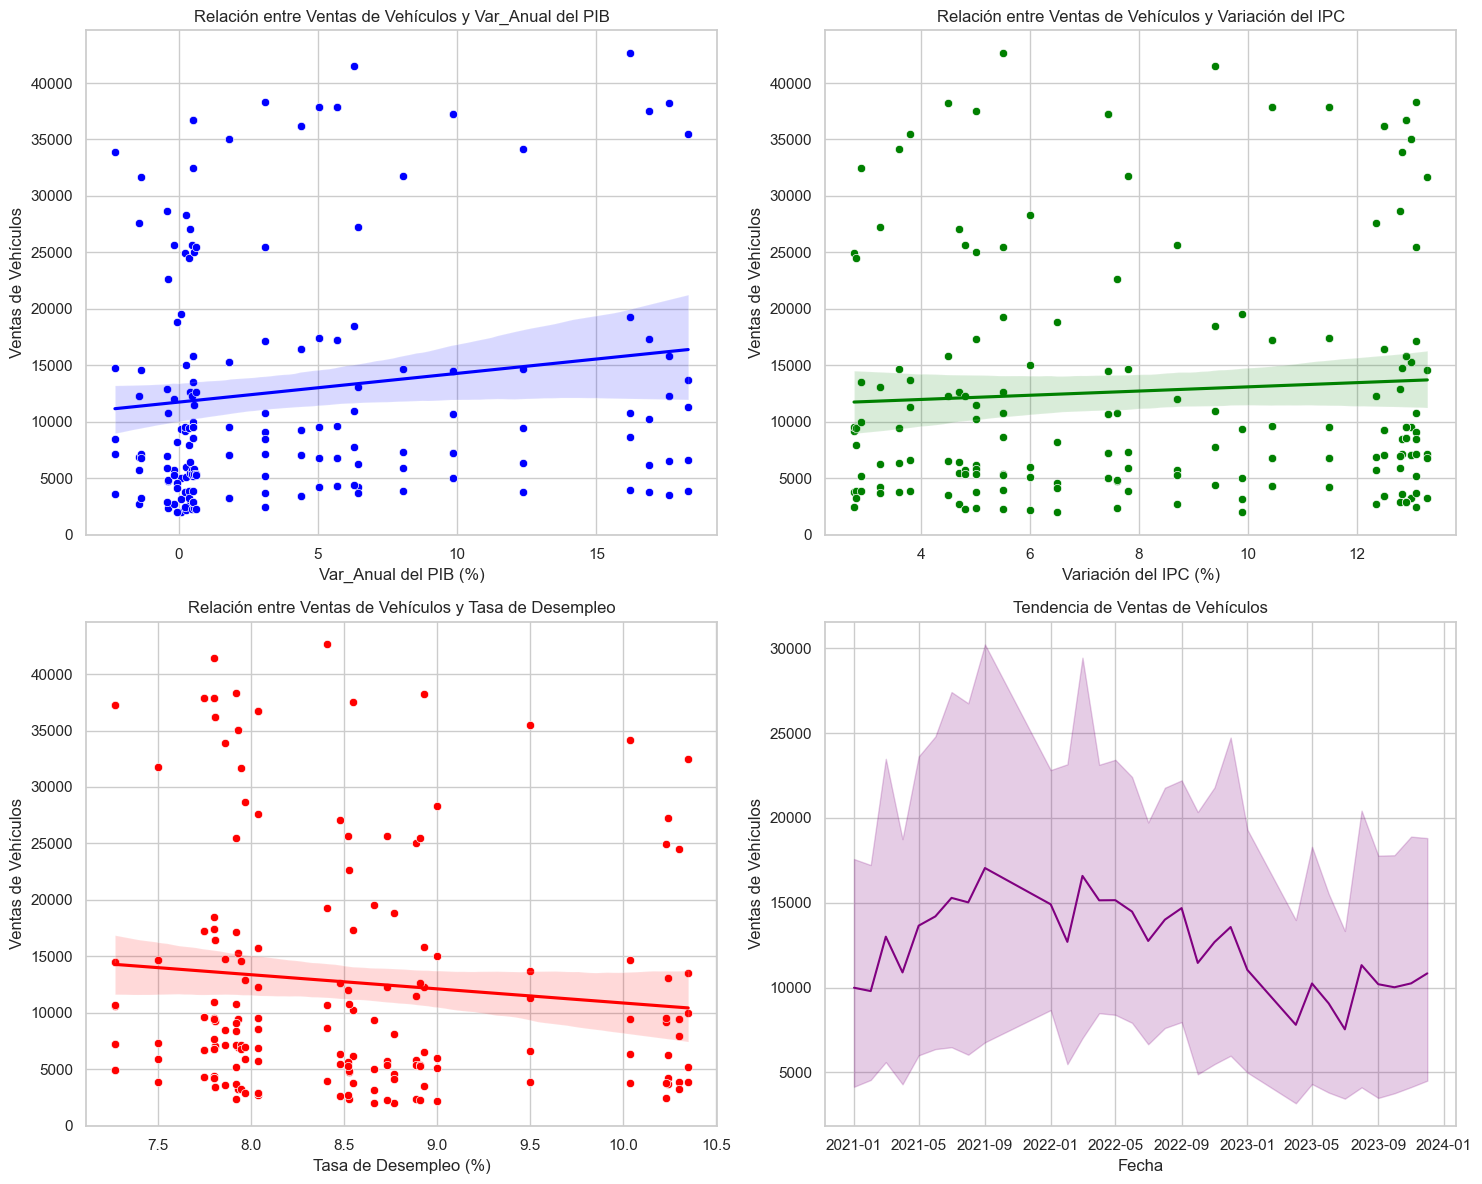

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Crear figuras y ejes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Gráfico de relación entre ventas de vehículos y variación anual del PIB
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='Var_Anual', y='Ventas_Vehiculos', color='blue')
sns.regplot(ax=axes[0, 0], data=merged_df, x='Var_Anual', y='Ventas_Vehiculos', scatter=False, color='blue')
axes[0, 0].set_title('Relación entre Ventas de Vehículos y Var_Anual del PIB')
axes[0, 0].set_xlabel('Var_Anual del PIB (%)')
axes[0, 0].set_ylabel('Ventas de Vehículos')

# Gráfico de relación entre ventas de vehículos y variación del IPC
sns.scatterplot(ax=axes[0, 1], data=merged_df, x='IPC_Variacion', y='Ventas_Vehiculos', color='green')
sns.regplot(ax=axes[0, 1], data=merged_df, x='IPC_Variacion', y='Ventas_Vehiculos', scatter=False, color='green')
axes[0, 1].set_title('Relación entre Ventas de Vehículos y Variación del IPC')
axes[0, 1].set_xlabel('Variación del IPC (%)')
axes[0, 1].set_ylabel('Ventas de Vehículos')

# Gráfico de relación entre ventas de vehículos y tasa de desempleo
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='Nacional', y='Ventas_Vehiculos', color='red')
sns.regplot(ax=axes[1, 0], data=merged_df, x='Nacional', y='Ventas_Vehiculos', scatter=False, color='red')
axes[1, 0].set_title('Relación entre Ventas de Vehículos y Tasa de Desempleo')
axes[1, 0].set_xlabel('Tasa de Desempleo (%)')
axes[1, 0].set_ylabel('Ventas de Vehículos')

# Gráfico de la tendencia de ventas de vehículos a lo largo del tiempo
sns.lineplot(ax=axes[1, 1], data=merged_df, x='Fecha', y='Ventas_Vehiculos', color='purple')
axes[1, 1].set_title('Tendencia de Ventas de Vehículos')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Ventas de Vehículos')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()



In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Asegurarse de que los datos están limpios y listos para el modelado
combined_data.drop_duplicates(inplace=True)
combined_data.fillna(0, inplace=True)  # Llenar valores nulos con ceros o con la media/mediana según corresponda

# Convertir variables categóricas en variables dummy
combined_data = pd.get_dummies(combined_data, drop_first=True)

# Selección de variables predictoras y variable objetivo
# Asumimos que 'Variación %' es la columna de ventas
X = combined_data.drop(['Variación %'], axis=1)
y = combined_data['Variación %']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Desarrollar y entrenar modelos

# Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# Árboles de Decisión
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

# Redes Neuronales
model_nn = MLPRegressor(random_state=42, max_iter=500)
model_nn.fit(X_train, y_train)
y_pred_train_nn = model_nn.predict(X_train)
y_pred_test_nn = model_nn.predict(X_test)

mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
r2_train_nn = r2_score(y_train, y_pred_train_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)

# Mostrar los resultados en un DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Neural Network'],
    'Train MSE': [mse_train_lr, mse_train_dt, mse_train_nn],
    'Test MSE': [mse_test_lr, mse_test_dt, mse_test_nn],
    'Train R2': [r2_train_lr, r2_train_dt, r2_train_nn],
    'Test R2': [r2_test_lr, r2_test_dt, r2_test_nn]
})

print(results)


               Model  Train MSE    Test MSE  Train R2   Test R2
0  Linear Regression  39.374353  407.426405  0.953143  0.719012
1      Decision Tree   0.000000  377.670526  1.000000  0.739534
2     Neural Network  32.485077  427.226520  0.961342  0.705357


C:\Users\esteb\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
# Definir los parámetros para la búsqueda
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Crear el modelo de red neuronal
model_nn = MLPRegressor(max_iter=1000, random_state=42)

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model_nn, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Realizar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
model_nn_best = MLPRegressor(**best_params, max_iter=1000, random_state=42)
model_nn_best.fit(X_train, y_train)
y_pred_train_nn_best = model_nn_best.predict(X_train)
y_pred_test_nn_best = model_nn_best.predict(X_test)

mse_train_nn_best = mean_squared_error(y_train, y_pred_train_nn_best)
mse_test_nn_best = mean_squared_error(y_test, y_pred_test_nn_best)
r2_train_nn_best = r2_score(y_train, y_pred_train_nn_best)
r2_test_nn_best = r2_score(y_test, y_pred_test_nn_best)

# Mostrar los resultados en un DataFrame
results_nn_best = pd.DataFrame({
    'Model': ['Neural Network (Best)'],
    'Train MSE': [mse_train_nn_best],
    'Test MSE': [mse_test_nn_best],
    'Train R2': [r2_train_nn_best],
    'Test R2': [r2_test_nn_best]
})

print(results_nn_best)


                   Model  Train MSE    Test MSE  Train R2   Test R2
0  Neural Network (Best)   0.005515  401.895225  0.999993  0.722827


In [96]:
# Actualizar el valor de alpha en los mejores parámetros
best_params['alpha'] = 0.001

# Ajustar el modelo de red neuronal con los mejores parámetros y regularización
model_nn_best = MLPRegressor(**best_params, max_iter=1000, random_state=42)
model_nn_best.fit(X_train, y_train)
y_pred_train_nn_best = model_nn_best.predict(X_train)
y_pred_test_nn_best = model_nn_best.predict(X_test)

mse_train_nn_best = mean_squared_error(y_train, y_pred_train_nn_best)
mse_test_nn_best = mean_squared_error(y_test, y_pred_test_nn_best)
r2_train_nn_best = r2_score(y_train, y_pred_train_nn_best)
r2_test_nn_best = r2_score(y_test, y_pred_test_nn_best)

# Mostrar los resultados en un DataFrame
results_nn_best = pd.DataFrame({
    'Model': ['Neural Network (Best with Regularization)'],
    'Train MSE': [mse_train_nn_best],
    'Test MSE': [mse_test_nn_best],
    'Train R2': [r2_train_nn_best],
    'Test R2': [r2_test_nn_best]
})

print(results_nn_best)


                                       Model  Train MSE    Test MSE  Train R2  \
0  Neural Network (Best with Regularization)   0.005799  404.165735  0.999993   

    Test R2  
0  0.721261  


In [98]:
# Validación cruzada para el modelo de red neuronal con los mejores hiperparámetros
cv_scores = cross_val_score(model_nn_best, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Average Cross-validated R2:", cv_scores.mean())


Cross-validated R2 scores: [  -303.02815463    -29.30226901   -906.86659658   -857.6547248
 -19860.17905717]
Average Cross-validated R2: -4391.40616043794


In [100]:
# Limitar la profundidad del árbol de decisión
model_dt_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt_limited.fit(X_train, y_train)
y_pred_train_dt_limited = model_dt_limited.predict(X_train)
y_pred_test_dt_limited = model_dt_limited.predict(X_test)

mse_train_dt_limited = mean_squared_error(y_train, y_pred_train_dt_limited)
mse_test_dt_limited = mean_squared_error(y_test, y_pred_test_dt_limited)
r2_train_dt_limited = r2_score(y_train, y_pred_train_dt_limited)
r2_test_dt_limited = r2_score(y_test, y_pred_test_dt_limited)

# Validación cruzada
cv_scores_dt_limited = cross_val_score(model_dt_limited, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores (limited depth):", cv_scores_dt_limited)
print("Average Cross-validated R2 (limited depth):", cv_scores_dt_limited.mean())

# Mostrar los resultados en un DataFrame
results_dt_limited = pd.DataFrame({
    'Model': ['Decision Tree (Limited Depth)'],
    'Train MSE': [mse_train_dt_limited],
    'Test MSE': [mse_test_dt_limited],
    'Train R2': [r2_train_dt_limited],
    'Test R2': [r2_test_dt_limited]
})

print(results_dt_limited)


Cross-validated R2 scores (limited depth): [ 0.67303345 -0.3059884   0.52626542  0.65572014 -0.38670759]
Average Cross-validated R2 (limited depth): 0.23246460365642135
                           Model  Train MSE    Test MSE  Train R2   Test R2
0  Decision Tree (Limited Depth)  58.740234  422.188324  0.930097  0.708831


In [102]:
# Entrenar un modelo de bosque aleatorio
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Validación cruzada
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores (Random Forest):", cv_scores_rf)
print("Average Cross-validated R2 (Random Forest):", cv_scores_rf.mean())

# Mostrar los resultados en un DataFrame
results_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train MSE': [mse_train_rf],
    'Test MSE': [mse_test_rf],
    'Train R2': [r2_train_rf],
    'Test R2': [r2_test_rf]
})

print(results_rf)


Cross-validated R2 scores (Random Forest): [ 0.60167522 -0.258094    0.79240552  0.81925988 -0.30566383]
Average Cross-validated R2 (Random Forest): 0.3299165580810616
           Model  Train MSE   Test MSE  Train R2   Test R2
0  Random Forest  39.018113  372.10707  0.953567  0.743371


In [104]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo de bosque aleatorio
model_rf = RandomForestRegressor(random_state=42)

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Realizar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params_rf = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
model_rf_best = RandomForestRegressor(**best_params_rf, random_state=42)
model_rf_best.fit(X_train, y_train)
y_pred_train_rf_best = model_rf_best.predict(X_train)
y_pred_test_rf_best = model_rf_best.predict(X_test)

mse_train_rf_best = mean_squared_error(y_train, y_pred_train_rf_best)
mse_test_rf_best = mean_squared_error(y_test, y_pred_test_rf_best)
r2_train_rf_best = r2_score(y_train, y_pred_train_rf_best)
r2_test_rf_best = r2_score(y_test, y_pred_test_rf_best)

# Validación cruzada
cv_scores_rf_best = cross_val_score(model_rf_best, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores (Best Random Forest):", cv_scores_rf_best)
print("Average Cross-validated R2 (Best Random Forest):", cv_scores_rf_best.mean())

# Mostrar los resultados en un DataFrame
results_rf_best = pd.DataFrame({
    'Model': ['Random Forest (Best)'],
    'Train MSE': [mse_train_rf_best],
    'Test MSE': [mse_test_rf_best],
    'Train R2': [r2_train_rf_best],
    'Test R2': [r2_test_rf_best]
})

print(results_rf_best)


Cross-validated R2 scores (Best Random Forest): [ 0.61040796 -0.25681896  0.7997278   0.81738939 -0.40635225]
Average Cross-validated R2 (Best Random Forest): 0.31287078852056005
                  Model  Train MSE    Test MSE  Train R2   Test R2
0  Random Forest (Best)  79.809487  492.157364  0.905024  0.660576
